## Packages

In [2]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

import dcor
from statsmodels.graphics.tsaplots import plot_acf

import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import itertools

from sklearn.ensemble import IsolationForest

from matplotlib import patches

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
plt.rcParams.update({'font.size': 14})
plt.style.use('ggplot')

## Load Files

In [3]:
tb_number = 17
ftir_channel = 2

metadata_df = pd.concat([
    pd.read_pickle('TB17_metadata_df.pkl'),
], ignore_index=True)

# Load and merge TB17 and TB14 DataFrames
merged_influx_df = pd.concat([
    pd.read_pickle('TB17_merged_influx_df.pkl'),
], ignore_index=True)

stat_df = pd.concat([
    pd.read_pickle('TB17_stat_df.pkl'),
], ignore_index=True)

final_df = pd.concat([
    pd.read_pickle('TB17_final_df.pkl'),
], ignore_index=True)

# Load and merge dictionaries using update
merged_dict = {}
sensor_dict = {}
ftir_dict = {}
merged_dict = {}

with open(f'TB{tb_number}_merged_dict.pkl', 'rb') as file:
    merged_dict.update(pickle.load(file))
with open(f'TB{tb_number}_sensor_dict.pkl', 'rb') as file:
    sensor_dict.update(pickle.load(file))
with open(f'TB{tb_number}_merged_dict.pkl', 'rb') as file:
    merged_dict.update(pickle.load(file))

print("Merged data successfully saved.")

Merged data successfully saved.


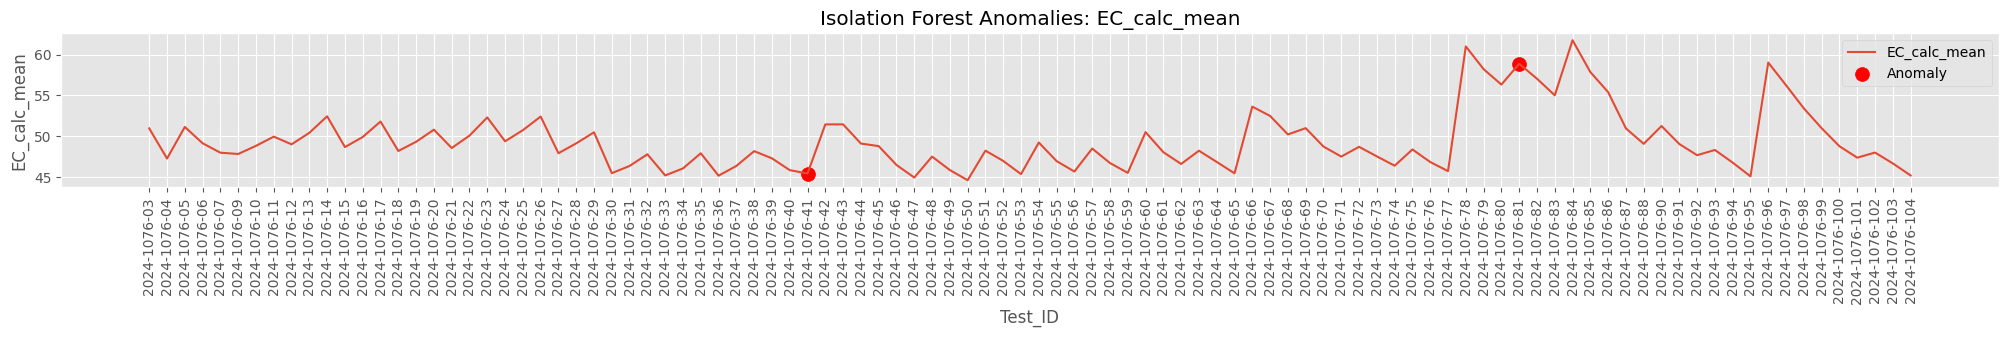

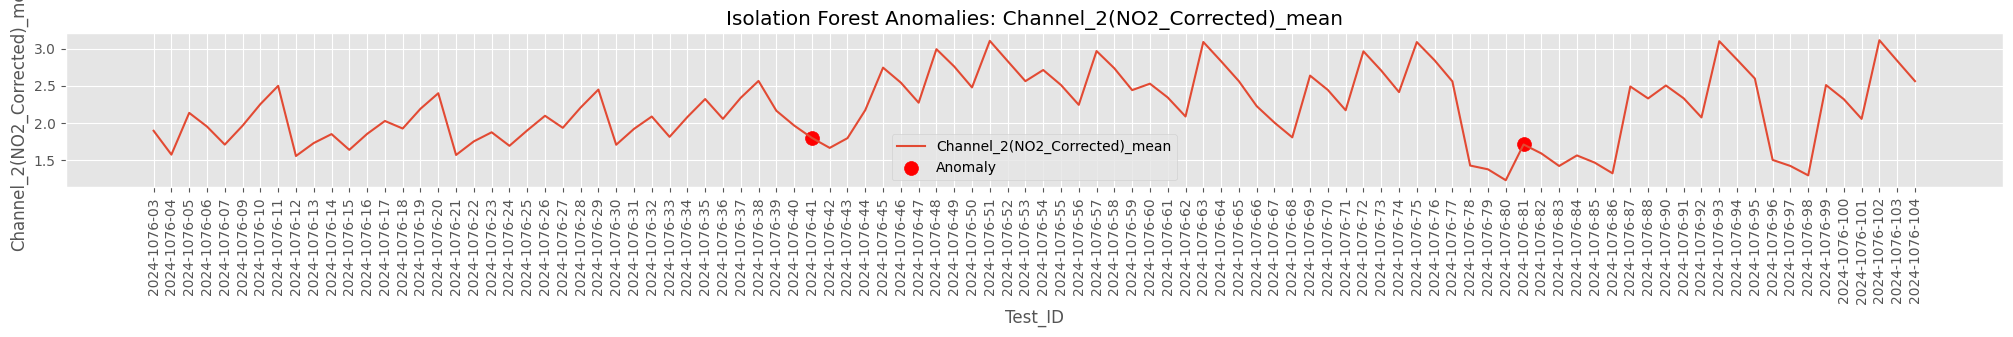

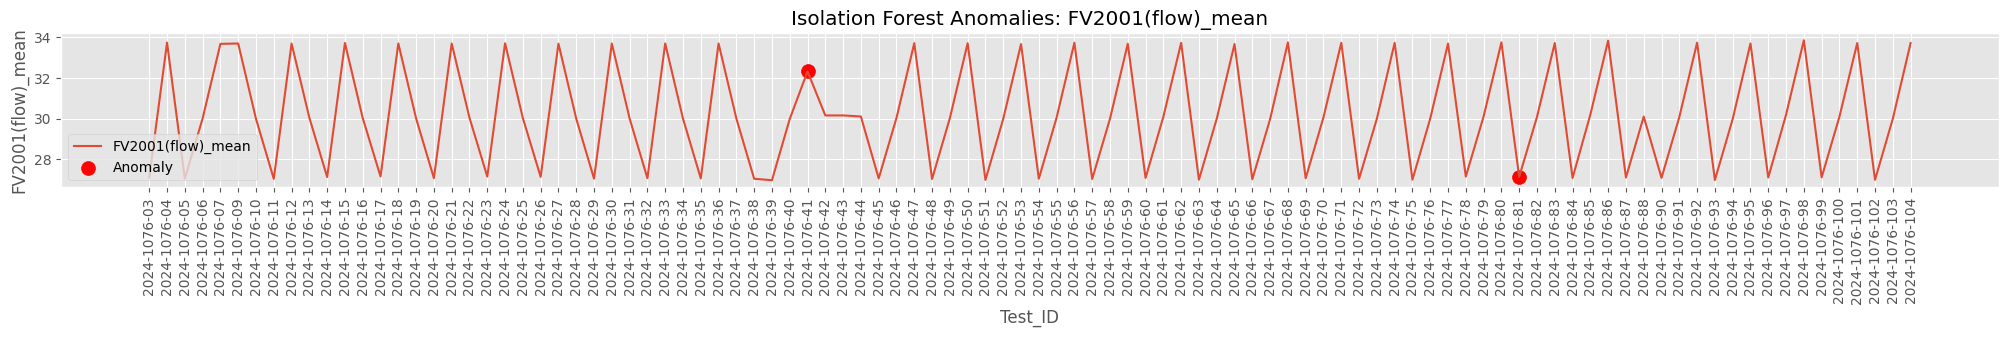

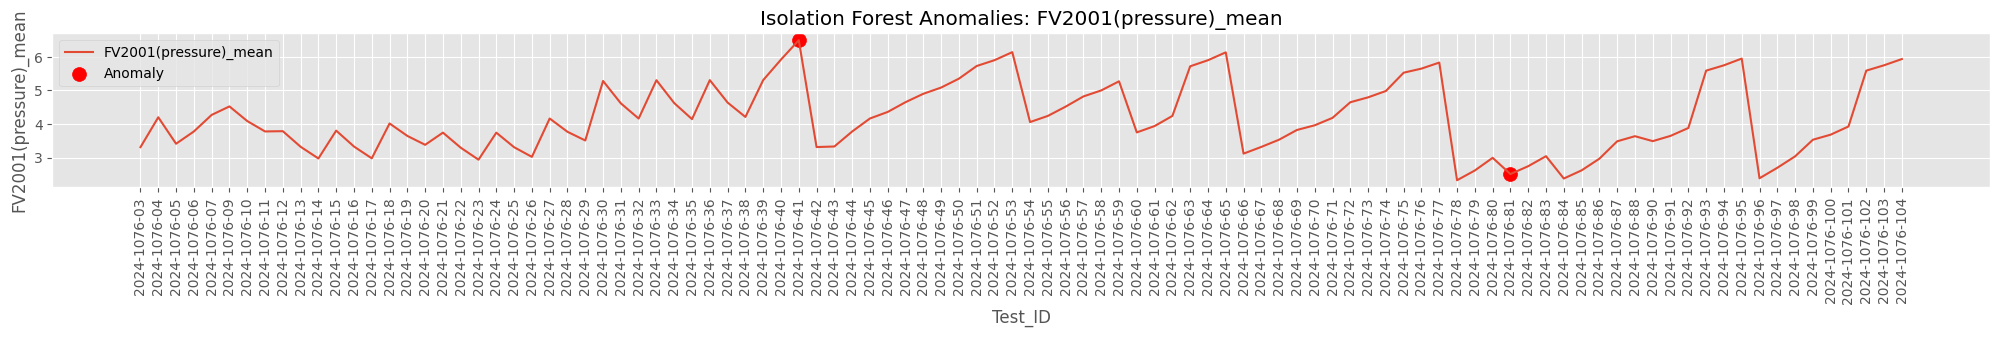

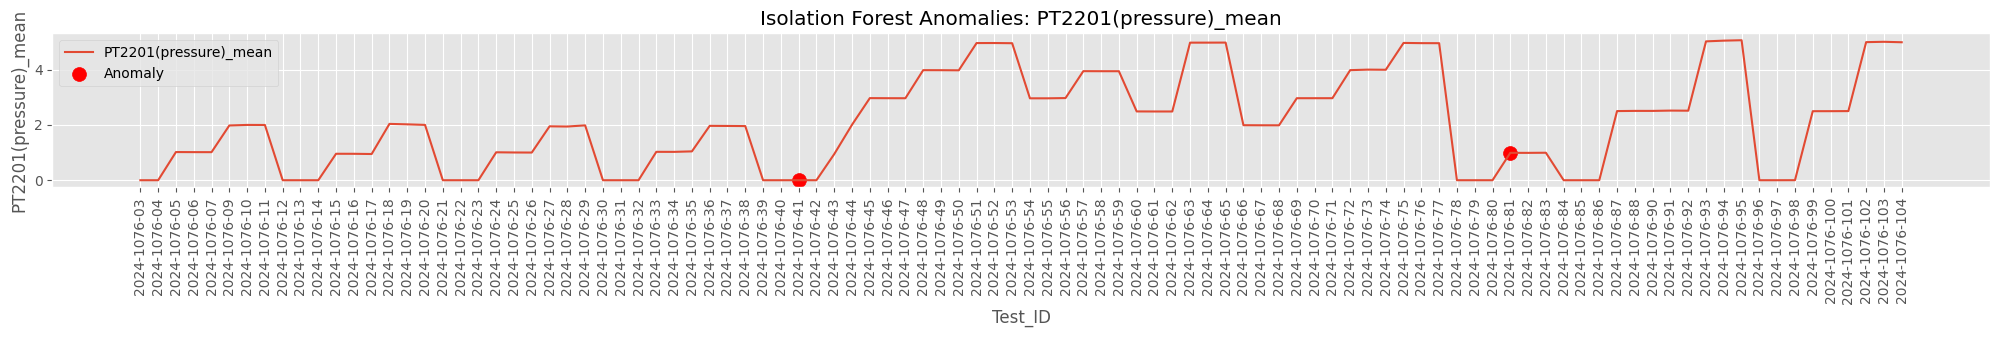

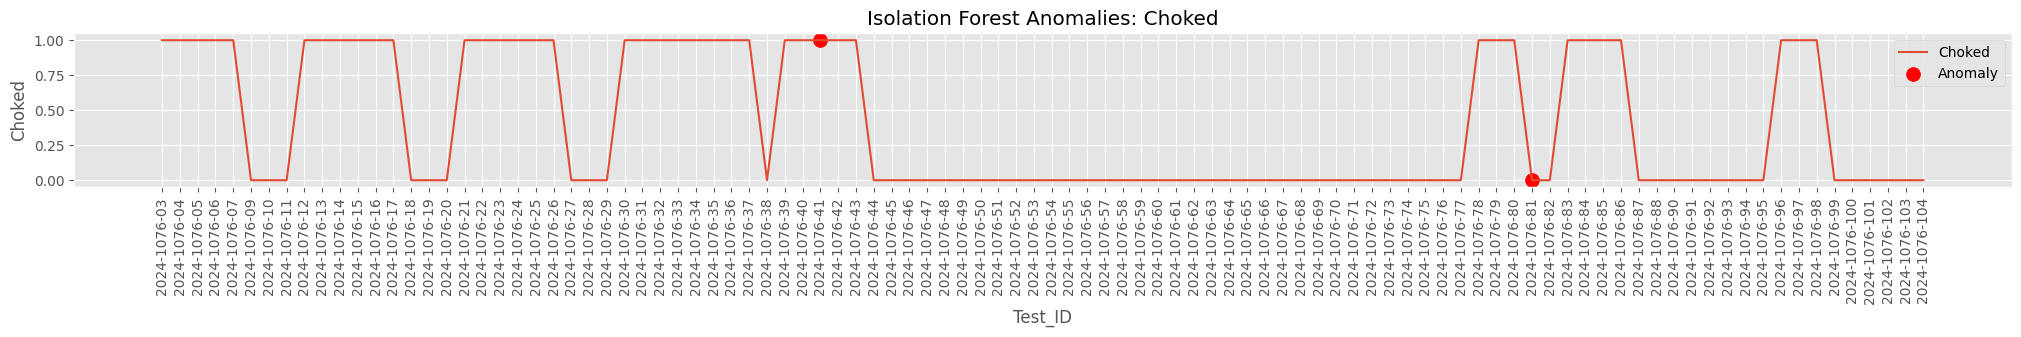

In [5]:
# Let the user pick the columns
columns_to_include = ['EC_calc_mean',
                      'Channel_2(NO2_Corrected)_mean',
                      'FV2001(flow)_mean',
                      'FV2001(pressure)_mean',
                      'PT2201(pressure)_mean',
                      'Choked'
                      ]  # Replace with your desired columns

# Drop NaNs from selected columns and fill others with 0
final_df.dropna(subset=columns_to_include, inplace=True)
# final_df[columns_to_include] = final_df[columns_to_include].fillna(0)  # Replace NaNs with 0 (or use another method)

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.015, random_state=None)
final_df['anomaly'] = model.fit_predict(final_df[columns_to_include])

# Extract anomalies
anomalies = final_df[final_df['anomaly'] == -1]

# Plot the data and anomalies
for col in columns_to_include:
    plt.figure(figsize=(25,2))
    plt.plot(final_df['Test_ID'], final_df[col], label=col)
    plt.scatter(anomalies['Test_ID'], anomalies[col], color='red', label='Anomaly', s=100)
    plt.title(f'Isolation Forest Anomalies: {col}')
    plt.legend()
    plt.xlabel('Test_ID')
    plt.xticks(rotation=90)
    plt.ylabel(col)
    plt.show()